In [2]:
from unrealcv import client
import os, sys, time

=> Info: Use inet client...


In [3]:
# connect to ue
client.connect()
if not client.isconnected():
    print('UnrealCV server is not running.')

INFO:__init__:234:Got connection confirm: b'connected to warehouse_simple'


=>Info: using ip-port socket


In [32]:
res = client.request(f'vset /camera/1/size 1200 800')
print(res)
res = client.request(f'vset /camera/1/fov 87')
print(res)

ok
ok


In [33]:

# check config
res = client.request('vget /unrealcv/status')
# The image resolution and port is configured in the config file.
print(res)

Is Listening
Client Connected
9000
Configuration
Config file: C:/Program Files/Epic Games/UE_4.27/Engine/Binaries/Win64/unrealcv.ini
Port: 9000
Width: 1200
Height: 800
FOV: 87.000000
EnableInput: true
EnableRightEye: false



In [34]:
# import stuff
import numpy as np
from matplotlib import pyplot as plt

In [7]:
pwd

'c:\\Users\\kazuya\\warehouse_drone\\simulation\\ue4_dataset_generation'

c:\Users\kazuya\warehouse_drone\simulation\ue4_dataset_generation\depth_front.npy


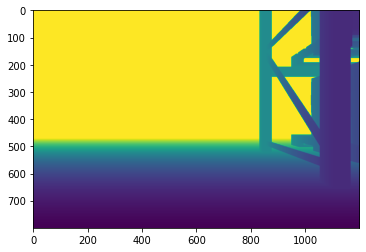

In [113]:
# get depth image
res = client.request(f'vset /camera/1/location -30 500 70')
res = client.request(f'vset /camera/1/rotation 0 -180 0')
res = client.request('vget /camera/1/depth c:\\Users\\kazuya\\warehouse_drone\\simulation\\ue4_dataset_generation\\depth_front.npy')
print(res)
img_array = np.load('depth_front.npy')
plt.imshow(img_array)
plt.show()


In [12]:
# get camera location
res = client.request(f'vget /camera/1/location')
print(res)
res = client.request(f'vget /camera/1/rotation')
print(res)

100.000 40.000 130.000
0.000 -180.000 0.000


In [101]:
from PIL import Image

def conevrt_to_gray(img_array, folder, index_num):
    index_num = str(index_num).zfill(6)

    img_array = img_array * 10

    if img_array.max() > 65535 or img_array.min() < 0:
        img_array = (img_array - img_array.min()) / (img_array.max() - img_array.min()) * 65535

    # Convert to uint8
    img_array = img_array.astype(np.uint16)

    # Convert the numpy array to a Pillow Image
    image = Image.fromarray(img_array)

    # Save the image as a PNG file
    image.save(f'{folder}\\{index_num}.png')

In [114]:
for i in range(400):

    res = client.request(f'vset /camera/1/location 0 {100+i} 70')
    res = client.request(f'vset /camera/1/rotation 0 -180 0')
    res = client.request('vget /camera/1/depth c:\\Users\\kazuya\\warehouse_drone\\simulation\\ue4_dataset_generation\\depth_front.npy')
    img_array = np.load('depth_front.npy')
    conevrt_to_gray(img_array, 'c:\\Users\\kazuya\\warehouse_drone\\simulation\\ue4_dataset_generation\\dataset\\depth', i)
    res = client.request(f'vget /camera/1/lit c:\\Users\\kazuya\\warehouse_drone\\simulation\\ue4_dataset_generation\\dataset\\color_png\\{str(i).zfill(6)}.png')
    res = client.request(f'vget /camera/1/object_mask c:\\Users\\kazuya\\warehouse_drone\\simulation\\ue4_dataset_generation\\dataset\\object\\{str(i).zfill(6)}.png')

# for i in range(27):
#     res = client.request(f'vset /camera/1/location 0 {100+i*10} 120')
#     res = client.request(f'vset /camera/1/rotation 0 -180 0')
#     res = client.request('vget /camera/1/depth c:\\Users\\kazuya\\warehouse_drone\\simulation\\ue4_dataset_generation\\depth_front.npy')
#     img_array = np.load('depth_front.npy')
#     conevrt_to_gray(img_array, 'c:\\Users\\kazuya\\warehouse_drone\\simulation\\ue4_dataset_generation\\dataset\\depth', i+27)
#     res = client.request(f'vget /camera/1/lit c:\\Users\\kazuya\\warehouse_drone\\simulation\\ue4_dataset_generation\\dataset\\color_png\\{str(i+27).zfill(6)}.png')
#     res = client.request(f'vget /camera/1/object_mask c:\\Users\\kazuya\\warehouse_drone\\simulation\\ue4_dataset_generation\\dataset\\object\\{str(i+27).zfill(6)}.png')


In [116]:
import os
from PIL import Image

def convert_png_to_jpg(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(".png"):
            png_path = os.path.join(input_folder, filename)
            jpg_filename = filename.replace(".png", ".jpg")
            jpg_path = os.path.join(output_folder, jpg_filename)

            with Image.open(png_path) as img:
                rgb_img = img.convert("RGB")
                rgb_img.save(jpg_path, "JPEG")

input_folder = 'c:\\Users\\kazuya\\warehouse_drone\\simulation\\ue4_dataset_generation\\dataset\\object'
output_folder = 'c:\\Users\\kazuya\\warehouse_drone\\simulation\\ue4_dataset_generation\\dataset\\color'

convert_png_to_jpg(input_folder, output_folder)
